In [0]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib as mlp
mlp.rcParams['axes.grid'] = False

# Load Dataset Images

In [0]:
# Thank's Jonata!
filename = '2019-02-28-crystal.zip'
data_url = 'https://storage.googleapis.com/public.analitico.ai/data/crystal-design/' + filename
!wget {data_url}
!unzip -q {filename}

path = 'images/'

--2019-03-10 10:20:33--  https://storage.googleapis.com/public.analitico.ai/data/crystal-design/2019-02-28-crystal.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2389066515 (2.2G) [application/zip]
Saving to: ‘2019-02-28-crystal.zip’

2019-02-28-crystal. 100%[===================>]   2.22G  38.4MB/s    in 78s     

2019-03-10 10:21:54 (29.1 MB/s) - ‘2019-02-28-crystal.zip’ saved [2389066515/2389066515]



# Load Dataset Table

In [0]:
!wget https://raw.githubusercontent.com/tvmlverona/ProgettoPoltroni/master/poltroni-molto-meglio-clean.csv

--2019-03-10 10:22:24--  https://raw.githubusercontent.com/tvmlverona/ProgettoPoltroni/master/poltroni-molto-meglio-clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1777854 (1.7M) [text/plain]
Saving to: ‘poltroni-molto-meglio-clean.csv’

poltroni-molto-megl 100%[===================>]   1.70M  --.-KB/s    in 0.1s    

2019-03-10 10:22:24 (17.2 MB/s) - ‘poltroni-molto-meglio-clean.csv’ saved [1777854/1777854]



In [0]:
dataset = pd.read_csv('poltroni-molto-meglio-clean.csv')
dataset.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16121 entries, 0 to 16120
Data columns (total 8 columns):
DivaNr          16121 non-null object
Color           16121 non-null object
Red             16121 non-null float64
Green           16121 non-null float64
Blue            16121 non-null float64
PoltroniCode    16121 non-null object
ImgName         16121 non-null object
RotAngle        16121 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1 MB


In [0]:
dataset.sort_values(by=['PoltroniCode', 'RotAngle']).head(36)

,DivaNr,Color,Red,Green,Blue,PoltroniCode,ImgName,RotAngle
15711,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-1.jpg,10
15692,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-2.jpg,20
15716,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-3.jpg,30
15721,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-4.jpg,40
15723,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-5.jpg,50
15717,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-6.jpg,60
15719,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-7.jpg,70
15709,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-8.jpg,80
15700,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-9.jpg,90
15704,DIVA-101172-1-1541516948506,793A36,0.472656,0.226562,0.210938,DIVA-101172-1,DIVA-101172-1Start-1-10.jpg,100


# Train-Test Split

## Setup Rotation Angle

In [0]:
dataset['SinRotAngle'] = dataset['RotAngle'].apply(lambda x: np.sin(2 * np.pi * x/360.))
dataset['CosRotAngle'] = dataset['RotAngle'].apply(lambda x: np.cos(2 * np.pi * x/360.))

## Split Data Depending on the Rotation Angle

In [0]:
# Percentge of angles used to validate the model
VALID_SIZE = 0.15

# Percenage of Poltroni models (with their 36 views) used to test the model
TEST_SIZE = 0.05


# Poltroni models will be splitted into training and validation set
# depending on the rotation angle (order does matter)

# For every unique poltroni model select a random angle where to start the split
poltroni_list = dataset['PoltroniCode'].unique().tolist()
rand_angles = {}
for poltroni in poltroni_list:
    rand_angles[poltroni] = random.randint(1, 36) * 10


def split_by_angle(angle, rand_angle, valid_frac):
    # 10-[### test ####t|#### valid ####v|########## train ##########]-360
    v = int(36 * valid_frac) * 10

    # Peter's angles go from 10 degrees to 360
    valid_angles = [x % 360 + 10 for x in range(rand_angle, (rand_angle + v), 10)]
    
    if angle in valid_angles:
        return 'Valid'
    else:
        return 'Train'
    

dataset['Partition'] = dataset[['PoltroniCode', 'RotAngle']].apply(lambda x: split_by_angle(x['RotAngle'], 
                                                                                            rand_angles[x['PoltroniCode']],
                                                                                            VALID_SIZE), axis=1)

poltroni_test = random.sample(poltroni_list, int(TEST_SIZE * len(poltroni_list)))
print('Unique poltroni models included in the test set : {:5d}'.format(len(poltroni_test)))
dataset['Partition'] = dataset[['PoltroniCode', 'Partition']].apply(lambda x: 'Test' if x['PoltroniCode'] in poltroni_test else x['Partition'], axis=1)

training_set = dataset.loc[dataset['Partition'] == 'Train']
validation_set = dataset.loc[dataset['Partition'] == 'Valid']
test_set = dataset.loc[dataset['Partition'] == 'Test']

Unique poltroni models included in the test set :    22


## Display Random Image

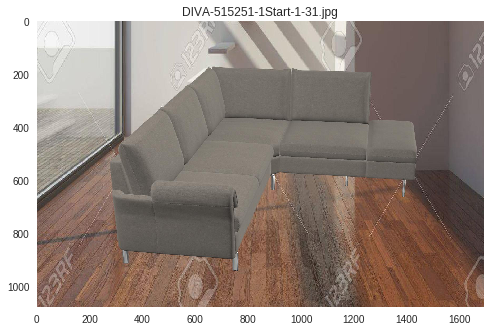

In [0]:
img_rand = dataset['ImgName'].sample().item()
img = plt.imread(path + img_rand)
plt.imshow(img)
plt.title(img_rand)
plt.show()

## Image Generator

In [0]:
from keras_preprocessing.image import ImageDataGenerator

BATCH_SIZE = 256
print('Batch Size : {:5d}'.format(BATCH_SIZE))

training_datagen = ImageDataGenerator(rotation_range=20,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      rescale=1./255)

testing_datagen = ImageDataGenerator(rescale=1./255)

print('\n* Training Set *')
train_generator = training_datagen.flow_from_dataframe(dataframe=training_set,
                                                       directory='images/',
                                                       x_col='ImgName',
                                                       y_col=['SinRotAngle', 'CosRotAngle'], 
                                                       target_size=(224, 224), 
                                                       class_mode='other',
                                                       batch_size=BATCH_SIZE)

print('\n* Validation Set *')
valid_generator = testing_datagen.flow_from_dataframe(dataframe=validation_set,
                                                      directory='images/',
                                                      x_col='ImgName', 
                                                      y_col=['SinRotAngle', 'CosRotAngle'],  
                                                      target_size=(224, 224), 
                                                      class_mode='other',
                                                      batch_size=BATCH_SIZE)

print('\n* Test Set *')
test_generator = testing_datagen.flow_from_dataframe(dataframe=test_set,
                                                     directory='images/',
                                                     x_col='ImgName', 
                                                     y_col=['SinRotAngle', 'CosRotAngle'], 
                                                     target_size=(224, 224), 
                                                     class_mode='other', 
                                                     batch_size=1,
                                                     shuffle=False)

Batch Size :   256

* Training Set *
Found 13199 images.

* Validation Set *
Found 2130 images.

* Test Set *
Found 792 images.


# Model

##1

In [0]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense

mobilenet = MobileNetV2(weights='imagenet')
mobilenet.layers.pop()

# Freeze the MobileNet conv layers
for layer in mobilenet.layers:
    layer.trainable = False

inner = Dense(128, activation='relu')(mobilenet.layers[-1].output)
output = Dense(2, activation='tanh')(inner)
model = Model(mobilenet.input, output)
model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['mae'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
14540800/14536120 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[

##2

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('tanh'))

model.compile(optimizer=Adam(lr=1e-2), loss='mse', metrics=['mae'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Training Phase

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


save_dir = time.strftime('%Y-%m-%d_%H.%M.%S', time.gmtime())
!mkdir {save_dir}


checkpoint = ModelCheckpoint('{}/model.hdf5'.format(save_dir), monitor='val_loss', save_best_only=True)
#stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0)
#lr_adjust = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

model.fit_generator(train_generator, 
                    steps_per_epoch = train_generator.samples // BATCH_SIZE,
                    validation_data = valid_generator, 
                    validation_steps = valid_generator.samples // BATCH_SIZE, 
                    epochs = 5,
                    callbacks=[checkpoint])

Epoch 1/5
51/51 [==============================] - 485s 10s/step - loss: 0.5310 - mean_absolute_error: 0.6460 - val_loss: 0.4836 - val_mean_absolute_error: 0.6227
Epoch 2/5
51/51 [==============================] - 463s 9s/step - loss: 0.4878 - mean_absolute_error: 0.6247 - val_loss: 0.4682 - val_mean_absolute_error: 0.6103
Epoch 3/5
51/51 [==============================] - 468s 9s/step - loss: 0.4836 - mean_absolute_error: 0.6210 - val_loss: 0.4512 - val_mean_absolute_error: 0.5990
Epoch 4/5
51/51 [==============================] - 463s 9s/step - loss: 0.4761 - mean_absolute_error: 0.6139 - val_loss: 0.4459 - val_mean_absolute_error: 0.5966
Epoch 5/5
51/51 [==============================] - 458s 9s/step - loss: 0.4712 - mean_absolute_error: 0.6103 - val_loss: 0.4366 - val_mean_absolute_error: 0.5853


# Validation Phase

In [0]:
from keras.models import load_model

model = load_model('{}/model.hdf5'.format(save_dir))

performance = model.evaluate_generator(test_generator, steps=test_generator.samples)

prediction = model.predict_generator(test_generator, steps=test_generator.samples)

In [0]:
performance

[0.4314568410110142, 0.5837323735985491]

In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_generator.data, prediction)

In [0]:
dir(test_generator)

In [0]:
print(test_generator.data)
print(prediction)

[[-0.64278761 -0.76604444]
 [-0.8660254   0.5       ]
 [-0.93969262  0.34202014]
 ...
 [-0.34202014 -0.93969262]
 [-0.93969262  0.34202014]
 [ 0.76604444 -0.64278761]]
[[-0.00367763 -0.12118623]
 [-0.02413774 -0.17246486]
 [-0.00274391 -0.03387322]
 ...
 [-0.0252563  -0.02760017]
 [ 0.00758947  0.06522601]
 [ 0.00229871 -0.01556997]]


In [0]:
pd.DataFrame(prediction, columns=['Pred-SinRotAngle', 'Pred-CosRotAngle'], index=test_set.index).head()

,Pred-SinRotAngle,Pred-CosRotAngle
288,-0.003678,-0.121186
289,-0.024138,-0.172465
290,-0.002744,-0.033873
291,-0.026091,-0.220175
292,0.014532,0.088378


In [0]:
def polar_coords_inverse(x_sin, x_cos):
    return np.arctan2(x_cos, x_sin) / (2 * np.pi) * 360.

true = polar_coords_inverse(test_generator.data[:, 1], test_generator.data[:, 0])
pred = polar_coords_inverse(prediction[:, 1], prediction[:, 0])

df = pd.DataFrame(columns=['True', 'Pred'])
df['True'] = true
df['Pred'] = pred

df.astype('int').head(50)

,True,Pred
0,-140,-178
1,-60,-172
2,-70,-175
3,140,-173
4,-110,9
5,-160,10
6,-100,6
7,120,7
8,-19,6
9,30,-172
